# Simple Data Fitting Using `linregress`


## Introduction
Linear regression is a fundamental statistical method used to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. `linregress` function from the `scipy.stats` module provides a quick and easy way to perform this analysis in Python.


## Setup
First, we need to install and import the necessary packages.


In [51]:
# Install necessary packages (Uncomment if needed)
# !pip install numpy scipy matplotlib nbconvert


In [52]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress



## Sample Data Generation
Let's generate some sample data that follows a linear trend.


In [53]:
# Generate sam,ple data
np.random.seed(11)  # For reproducibility
x = np.arange(10)  # Independent variable
y = 2.5 * x + np.random.randn(10)  # Dependent variable with some noise

# Uncomment to see the generated data
# print(x)
# print(y)

## Performing Linear Regression
Now, we'll use the `linregress` function to fit a linear model to our data.


In [54]:
# Perform linear regression
result = linregress(x, y)

print(f"Slope: {result.slope}")
print(f"Intercept: {result.intercept}")
print(f"R-squared: {result.rvalue**2}")


Slope: 2.43729034154933
Intercept: -0.004626226785319432
R-squared: 0.9779055687199582


## Visualizing the Fit
Let's visualize our data points and the linear fit to see how well our model represents the data.


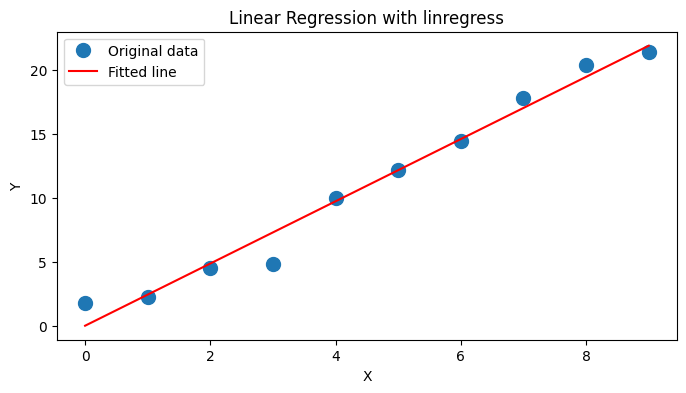

In [55]:
# Plotting the data and the linear fit
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, result.intercept + result.slope * x, 'r', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with linregress')
plt.legend()
plt.show()


### Understanding Linear Regression Under the Hood

Linear regression is not just about fitting a line through a set of data points—it's based on several key assumptions about the data:

1. **Linearity**: The relationship between the independent and dependent variable should be linear.
2. **Independence**: The residuals (errors) should be independent of each other.
3. **Homoscedasticity**: The residuals should have constant variance at all levels of the independent variable.
4. **Normality**: The residuals of the model should be normally distributed.

If we violate these assumptions it can lead to inaccuracies in the regression results.

The `linregress` function in `scipy.stats` performs simple linear regression by fitting a line to the data points. It uses the method of least squares to minimize the sum of the squares of the residuals—the differences between the observed values and the values predicted by the linear model.

The mathematical equation for a simple linear regression line is:

$$
y = \beta_0 + \beta_1x + \epsilon
$$

where:
- $y$ is the dependent variable,
- $x$ is the independent variable,
- $\beta_0$ is the intercept of the regression line with the y-axis,
- $\beta_1$ is the slope of the regression line, indicating the change in $y$ for a one-unit change in $x$,
- $\epsilon$ is the error term, representing the residual or unexplained variation in the dependent variable.

The slope $\beta_1$ is calculated as:

$$
\beta_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

The intercept $\beta_0$ is calculated using the formula:

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

where $\bar{x}$ and $\bar{y}$ are the mean values of the independent and dependent variables, respectively.

`linregress` returns the slope and intercept along with several statistical values, such as the $p$-value for a hypothesis test on the slope, the $r$-value (correlation coefficient), and the standard error of the estimate, which are essential for understanding the reliability and significance of the linear model.


### The Mathematics of Linear Regression
The simple linear regression model can be described by the equation $y = \beta_0 + \beta_1x + \epsilon$, where $y$ is the dependent variable, $x$ is the independent variable, $\beta_0$ is the y-intercept, $\beta_1$ is the slope of the line, and $\epsilon$ represents the error term. The `linregress` function estimates the best-fitting line through the data points by minimizing the sum of the squares of the vertical distances of the points from the line.


In [58]:
from scipy.stats import linregress, t

# Calculate standard error of the slope (SE of beta_1)
n = len(x)  # Number of observations
x_mean = np.mean(x)  # Mean of independent variable
y_pred = result.intercept + result.slope * x  # Predicted values
sse = np.sum((y - y_pred)**2)  # Sum of squared errors
sum_squared_deviation_x = np.sum((x - x_mean)**2)
se_slope = np.sqrt(sse / ((n - 2) * sum_squared_deviation_x))

# Calculate the t-critical value for 95% confidence interval
alpha = 0.05  # Significance level for 95% confidence
t_critical = t.ppf(1 - alpha/2, df=n-2)  # t-critical value for 95% CI

# Calculate the margin of error for the slope
margin_error_slope = t_critical * se_slope

# Calculate the confidence intervals for the slope
ci_lower = result.slope - margin_error_slope
ci_upper = result.slope + margin_error_slope

# Output the standard error and confidence interval
print(f"Standard Error of the Slope: {se_slope}")
print(f"95% Confidence Interval for the Slope: ({ci_lower}, {ci_upper})")


Standard Error of the Slope: 0.12952548522993884
95% Confidence Interval for the Slope: (2.1386040370168873, 2.735976646081773)
